In [70]:
import pandas as pd

table = pd.read_pickle('table.pickle')

In [131]:
from collections import defaultdict

person_collocations = defaultdict(set)
grouped = table.loc[((~table.NerNpID.isnull()) & (table.NER == 'PERSON'))].groupby('NerNpID').Lemma
for _, group in grouped:
    collocation = set(group.values)
    if len(collocation) >= 2:
        for lemma in collocation:
            person_collocations[lemma] |= (collocation - {lemma})
person_collocations = dict(person_collocations)

In [132]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

persons = nx.Graph(new_collocations)
print(nx.nodes(persons))
print(len(nx.nodes(persons)))

['smith', 'e.', 'carlyle', 'joseph', 'watson', 'dennis', 'john', 'thomas', 'holmes', 'poe', 'guliolmi', 'van', 'tom', 'lestrade', 'murger', 'henri', 'philippe', 'whyte', 'harry', 'c', 'messrs.', 'jure', 'rance', 'enoch', 'stangerson', 'bischoff', 'brother', 'drebber', 'norman', 'h.', 'ferrier', 'audley', 'charpentier', 'blanco', 'neruda', 'johnny', 'croy', 'hones', 'hope', 'murcher', 'jefferson', 'allen', 'j.', 'arthur', 'von', 'court', 'tobias', 'de', 'william', 'edgar', 'lucy', 'madame', 'jansen', 'heber', 'sherlock', 'sierra', 'gregson', 'kemball', 'underwood']
59


In [133]:
print(nx.info(persons))

Name: 
Type: Graph
Number of nodes: 59
Number of edges: 42
Average degree:   1.4237


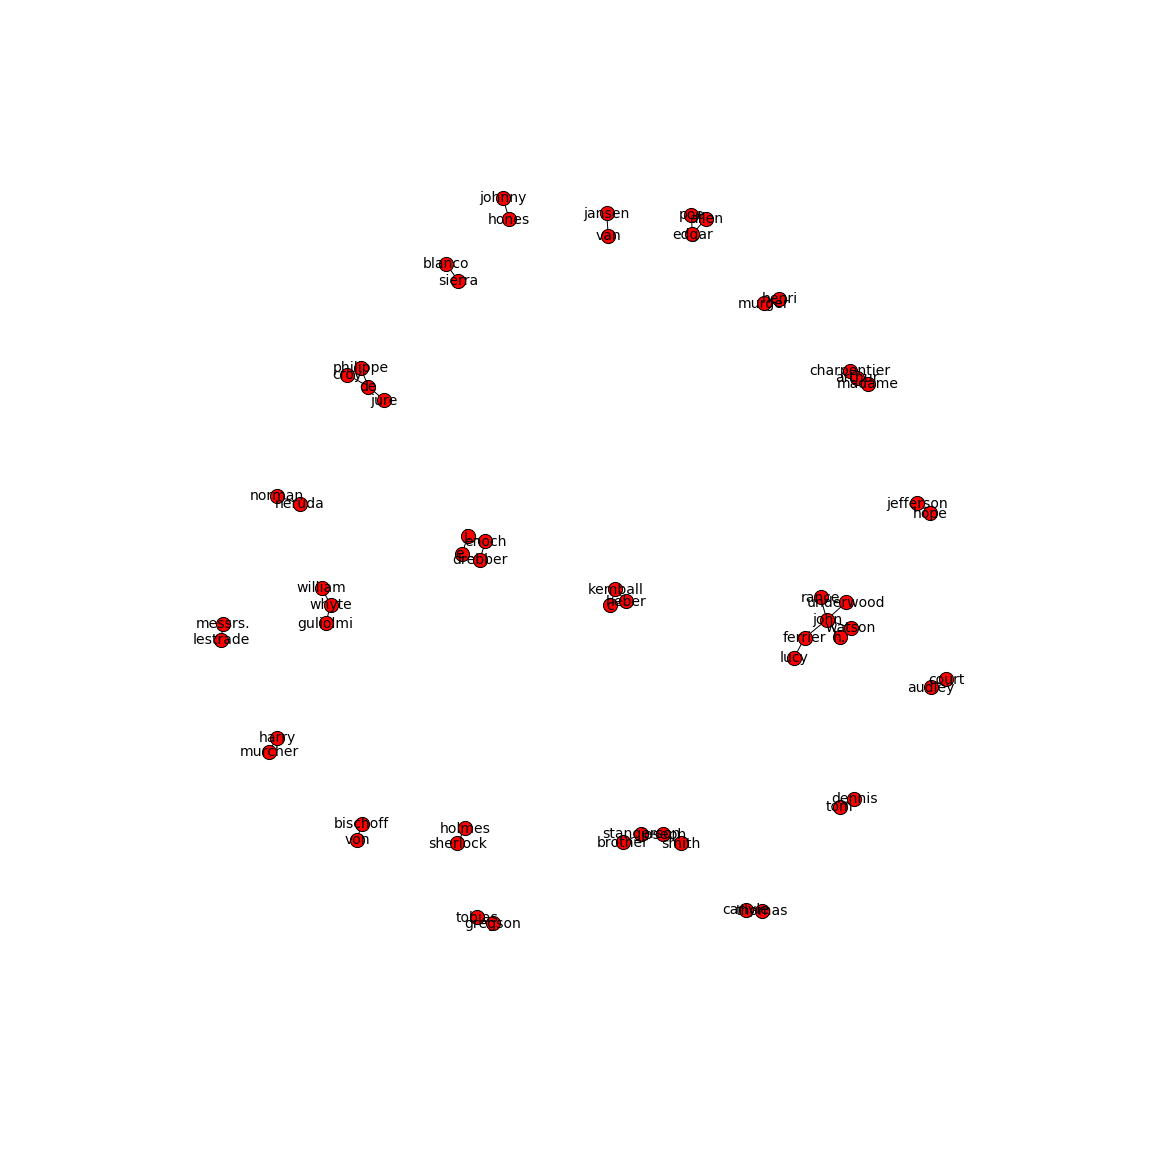

In [134]:
plt.figure(figsize=(20,20))
# plt.figure()
plt.axis('off')
# plt.axis('equal')
nx.draw_networkx(persons,
                 node_size=200,
                 font_size=14,
                 with_labels=True,
                 edge_cmap=plt.cm.jet)
plt.show()
#plt.savefig('graph.svg')

In [135]:
nx.clustering(persons)

{'allen': 1.0,
 'arthur': 0.0,
 'audley': 0.0,
 'bischoff': 0.0,
 'blanco': 0.0,
 'brother': 0.0,
 'c': 1.0,
 'carlyle': 0.0,
 'charpentier': 0.0,
 'court': 0.0,
 'croy': 1.0,
 'de': 0.3333333333333333,
 'dennis': 0.0,
 'drebber': 0.0,
 'e.': 0.0,
 'edgar': 1.0,
 'enoch': 0.0,
 'ferrier': 0.0,
 'gregson': 0.0,
 'guliolmi': 0.0,
 'h.': 1.0,
 'harry': 0.0,
 'heber': 1.0,
 'henri': 0.0,
 'holmes': 0.0,
 'hones': 0.0,
 'hope': 0.0,
 'j.': 0.0,
 'jansen': 0.0,
 'jefferson': 0.0,
 'john': 0.1,
 'johnny': 0.0,
 'joseph': 0.0,
 'jure': 0.0,
 'kemball': 1.0,
 'lestrade': 0.0,
 'lucy': 0.0,
 'madame': 0.0,
 'messrs.': 0.0,
 'murcher': 0.0,
 'murger': 0.0,
 'neruda': 0.0,
 'norman': 0.0,
 'philippe': 1.0,
 'poe': 1.0,
 'rance': 0.0,
 'sherlock': 0.0,
 'sierra': 0.0,
 'smith': 0.0,
 'stangerson': 0.0,
 'thomas': 0.0,
 'tobias': 0.0,
 'tom': 0.0,
 'underwood': 0.0,
 'van': 0.0,
 'von': 0.0,
 'watson': 1.0,
 'whyte': 0.0,
 'william': 0.0}

In [136]:
list(nx.connected_components(persons))

[{'brother', 'joseph', 'smith', 'stangerson'},
 {'drebber', 'e.', 'enoch', 'j.'},
 {'carlyle', 'thomas'},
 {'ferrier', 'h.', 'john', 'lucy', 'rance', 'underwood', 'watson'},
 {'dennis', 'tom'},
 {'holmes', 'sherlock'},
 {'allen', 'edgar', 'poe'},
 {'guliolmi', 'whyte', 'william'},
 {'jansen', 'van'},
 {'lestrade', 'messrs.'},
 {'henri', 'murger'},
 {'croy', 'de', 'jure', 'philippe'},
 {'harry', 'murcher'},
 {'c', 'heber', 'kemball'},
 {'bischoff', 'von'},
 {'neruda', 'norman'},
 {'audley', 'court'},
 {'arthur', 'charpentier', 'madame'},
 {'blanco', 'sierra'},
 {'hones', 'johnny'},
 {'hope', 'jefferson'},
 {'gregson', 'tobias'}]